In [131]:
import requests
import pandas as pd


In [161]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')
font = {'weight': 'bold',
        'size':   16}
plt.rc('font', **font)

In [147]:
state_api_url = 'https://covidtracking.com/api/v1/states/daily.json'

In [153]:
national_api_url = 'https://covidtracking.com/api/us/daily'

In [148]:
r = requests.get(state_api_url)

In [150]:
# r = requests.get(national_api_url)

In [151]:
r.status_code

200

In [152]:
r.content

b'[{"date":20200406,"states":56,"positive":361331,"negative":1555764,"pending":17292,"hospitalizedCurrently":27675,"hospitalizedCumulative":45168,"inIcuCurrently":6607,"inIcuCumulative":971,"onVentilatorCurrently":2932,"onVentilatorCumulative":187,"recovered":16006,"hash":"206c757b1b311a9be1cd19c90c9782422a421a55","dateChecked":"2020-04-06T20:00:00Z","death":10680,"hospitalized":45168,"total":1934387,"totalTestResults":1917095,"posNeg":1917095,"deathIncrease":1182,"hospitalizedIncrease":3796,"negativeIncrease":126040,"positiveIncrease":29023,"totalTestResultsIncrease":155063},{"date":20200405,"states":56,"positive":332308,"negative":1429724,"pending":17307,"hospitalizedCurrently":23061,"hospitalizedCumulative":41372,"inIcuCurrently":5497,"inIcuCumulative":913,"onVentilatorCurrently":612,"onVentilatorCumulative":193,"recovered":14486,"hash":"a5f1f58fe74620c89cde687c8beae82629c8b1e0","dateChecked":"2020-04-05T20:00:00Z","death":9498,"hospitalized":41372,"total":1779339,"totalTestResults"

In [136]:
type(r.content)

bytes

In [137]:
covid_list = json.loads(r.content)

In [138]:
covid_list

[{'date': 20200406,
  'state': 'AK',
  'positive': 191,
  'negative': 6692,
  'pending': None,
  'hospitalizedCurrently': None,
  'hospitalizedCumulative': 23,
  'inIcuCurrently': None,
  'inIcuCumulative': None,
  'onVentilatorCurrently': None,
  'onVentilatorCumulative': None,
  'recovered': None,
  'hash': '4d91929ba83b31e1dda30ca4a3c7d5716d39bfd7',
  'dateChecked': '2020-04-06T20:00:00Z',
  'death': 6,
  'hospitalized': 23,
  'total': 6883,
  'totalTestResults': 6883,
  'posNeg': 6883,
  'fips': '02',
  'deathIncrease': 0,
  'hospitalizedIncrease': 3,
  'negativeIncrease': 593,
  'positiveIncrease': 6,
  'totalTestResultsIncrease': 599},
 {'date': 20200406,
  'state': 'AL',
  'positive': 1968,
  'negative': 12797,
  'pending': None,
  'hospitalizedCurrently': None,
  'hospitalizedCumulative': 240,
  'inIcuCurrently': None,
  'inIcuCumulative': None,
  'onVentilatorCurrently': None,
  'onVentilatorCumulative': None,
  'recovered': None,
  'hash': '2efa35d0a2dc1dac3c6e12ced852169b719

In [143]:
type(covid_list)
#list of dictionaries

list

In [139]:
covid_list[0]

{'date': 20200406,
 'state': 'AK',
 'positive': 191,
 'negative': 6692,
 'pending': None,
 'hospitalizedCurrently': None,
 'hospitalizedCumulative': 23,
 'inIcuCurrently': None,
 'inIcuCumulative': None,
 'onVentilatorCurrently': None,
 'onVentilatorCumulative': None,
 'recovered': None,
 'hash': '4d91929ba83b31e1dda30ca4a3c7d5716d39bfd7',
 'dateChecked': '2020-04-06T20:00:00Z',
 'death': 6,
 'hospitalized': 23,
 'total': 6883,
 'totalTestResults': 6883,
 'posNeg': 6883,
 'fips': '02',
 'deathIncrease': 0,
 'hospitalizedIncrease': 3,
 'negativeIncrease': 593,
 'positiveIncrease': 6,
 'totalTestResultsIncrease': 599}

In [140]:
len(covid_list)

1765

In [144]:
list_of_dicts = []

for i in range(len(covid_list)):
    list_of_dicts.append(covid_list[i])

In [155]:
df_states = pd.DataFrame(list_of_dicts)

In [156]:
df_states.describe

<bound method NDFrame.describe of           date state  positive  negative  pending  hospitalizedCurrently  \
0     20200406    AK     191.0    6692.0      NaN                    NaN   
1     20200406    AL    1968.0   12797.0      NaN                    NaN   
2     20200406    AR     875.0   11970.0      NaN                   74.0   
3     20200406    AS       0.0      20.0     11.0                    NaN   
4     20200406    AZ    2456.0   30078.0      NaN                    NaN   
...        ...   ...       ...       ...      ...                    ...   
1760  20200304    OR       3.0      29.0     18.0                    NaN   
1761  20200304    SC       0.0       5.0      0.0                    NaN   
1762  20200304    TX       1.0       NaN      NaN                    NaN   
1763  20200304    WA      39.0       NaN      NaN                    NaN   
1764  20200304    WI       1.0      19.0      6.0                    NaN   

      hospitalizedCumulative  inIcuCurrently  inIcuCu

In [157]:
df_states.head()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,...,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease
0,20200406,AK,191.0,6692.0,NaN,NaN,23.0,NaN,NaN,NaN,...,23.0,6883,6883,6883,02,0.0,3.0,593.0,6.0,599.0
1,20200406,AL,1968.0,12797.0,NaN,NaN,240.0,NaN,NaN,NaN,...,240.0,14765,14765,14765,01,5.0,9.0,1515.0,172.0,1687.0
2,20200406,AR,875.0,11970.0,NaN,74.0,130.0,NaN,43.0,22.0,...,130.0,12845,12845,12845,05,0.0,0.0,1558.0,45.0,1603.0
3,20200406,AS,0.0,20.0,11.0,NaN,NaN,NaN,NaN,NaN,...,NaN,31,20,20,60,0.0,0.0,0.0,0.0,0.0
4,20200406,AZ,2456.0,30078.0,NaN,NaN,325.0,NaN,112.0,NaN,...,325.0,32534,32534,32534,04,1.0,15.0,4937.0,187.0,5124.0


In [158]:
mask = df_states['state'] == 'NY'

In [159]:
df_ny = df_states[mask]

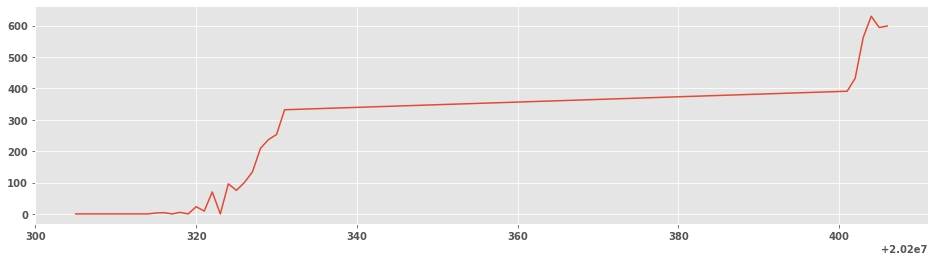

In [162]:
fig, ax = plt.subplots(figsize = (16,4))

ax.plot(df_ny['date'],df_ny['deathIncrease'])